# **IT8x20 Special Topic in Information Technology (Machine Learning and AI)**

# Assignment 3

**Individual Assessment**

**Submission deadline:** 2nd Feb 2023 - 12 PM midday

**Submission File:** Notebook file and its PDF equivalent with all outputs.

**Total marks: 20**

**Total weightage: 20**

**Student ID:** 22201670

**Student Name:** Sachith M. Gunawardane

**Objective: (1 mark)** The objective is ? 
The objective is to create an algorithm that can detect Whether a person is wearing a face mask. This is a binary classification problem using transfer learning on MobileNet2 to classify images into "with a mask." or "without a mask"


##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet                                                                                                                    # IGNORE_COPYRIGHT: cleared by OSS licensing
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Binary Classification with MobileNetV2
This exercise aims to develop Binary classification using transfer learning on MobileNetV2 to classify images of a person "with a mask." or "without a mask"

For this notebook we will be using the Face Mask Lite Dataset published by Prasoon Kottarathil on Kaggle which can be found [here](https://www.kaggle.com/datasets/prasoonkottarathil/face-mask-lite-dataset). This dataset is a collection of 20000 images images in 2 different classes, each class having 10000. All the images with the face mask are scrapped from google search and all the images without the face mask are preprocessed from the CelebFace dataset created on Kaggle. Thank you for all those contributed to this wonderful dataset.


### **About the Template**

[Roboflow](https://roboflow.com) This template has been taken from Roboflow and modified the sections since dataset is taken from Keggle. 


![kaggle Wordmark](https://storage.googleapis.com/kaggle-media/Kaggle%20Brand%20Guidelines%20CMS/png%20logo.png)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## Data preprocessing

### Data download

The following section has been modified based on week 4 - session one lecture notes published by Dr Waqar Khan with the title of "Managing Data for Image Classification" 

We'll download our dataset from Kaggle. 


1.	Create a API Token with Kaggle to access data

2.	Create a new project and identify a dataset which meets the following criteria.  **(3 marks)**
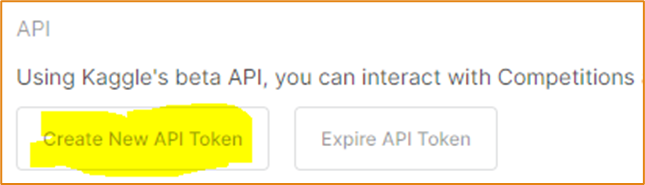

*   Has the ability to classify at most 2 types of objects.
*   Has at least 800 images
* 	Has Train, test, and valid images in the respective folders by default. For example,

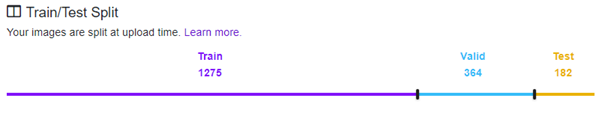

Also ensure that the selected dataset has folders laid out as follows **(2 marks)**

For this notebook we will be using the Face Mask Lite Dataset published by 
Prasoon Kottarathil on Kaggle which can be found [here](https://www.kaggle.com/datasets/prasoonkottarathil/face-mask-lite-dataset). This dataset is a collection of 20000 images images in 2 different classes (new_with_mask and new_without_mask), each class having 10000.

All 20,000 images were split in to Train, Valid and Test using splitfolders with the ratio of 70%, 20% and 10%, respectively. 

***Output***

Train - Found 14000 files belonging to 2 classes.

Valid - Found 4000 files belonging to 2 classes.

Test  - Found 2000 files belonging to 2 classes.

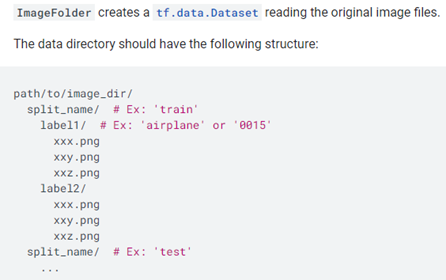

3.	Describe your dataset. Name the classes. Provide it’s URL. **(2 marks)**

Kindly refer to section 2 for class name and URL. 
I've included a screenshot of the folder structure below. 

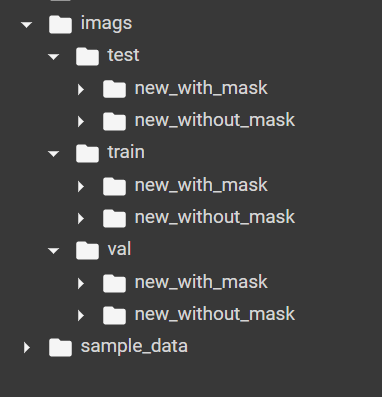

here:

4.	In RoboFlow page, go to Download raw images. 



> If you are able to further tweak the dataset with further preprocessing like adding some form of noise to it. RoboFlow does this step without scripting. Then you would earn **(2 marks)**. 


5.	Select Show Download Code and Continue. 
6.	Open the *Terminal tab* and copy the key from URL in double quotes. The key starts after ds/ and finishes at closing double quote. Double quote is not part of the key. Paste the KEY instead of `[YOUR-KEY-HERE]` in the next cell. Overwrite the square brackets too. **(2 marks)**


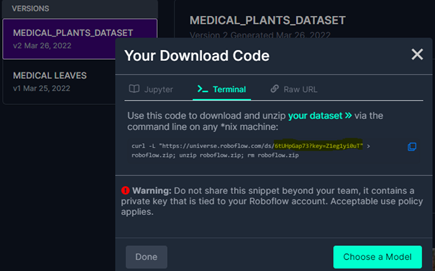

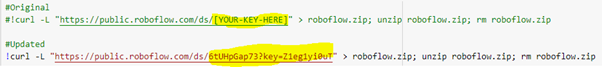

Note if you are repeating the running exercise from the start then in the following cell you might see a prompt during execution suggesting that the folders and files already exist and should it overwrite. Click on the cell to enable it and type Y and enter to allow overwriting.

*Note*
Above section is replace by Kaggle dataset download process 

In [ ]:
!pip install opendatasets
import opendatasets as od

od.download("www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachithgunawardane
Your Kaggle Key: ··········


100%|██████████| 604M/604M [00:27<00:00, 23.0MB/s]


Data set in Kaggle is not split to Train, Valid and Test. Therefore, following code is to split data in to above mention structure with 70% data for training 20% data for validtion and last 10% data for Testing.

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/content/facemask-detection-dataset-20000-images", # The location of dataset
                   output="/content/imags", # The output location
                   seed=22, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 20000 files [00:03, 5554.53 files/s]


In [ ]:
# Remove orginal data folder after copying images to ML structure 
!rm -rf '/content/facemask-detection-dataset-20000-images'

We need to turn this dataset into a Tensorflow Dataset format. Fortunately, Tensorflow provides the ImageFolder dataset structure which is compatible with the format we downloaded the data in. 

We will then use the builder to build the raw versions of our train, test, and validation data.

11.	*TensorFlow dataset* (TFDS) library is used to restructure data so that TensorFlow can process it. 

In [ ]:
train_dir = '/content/imags/train'
test_dir = '/content/imags/test'
val_dir = '/content/imags/val'

In [ ]:
data_train = image_dataset_from_directory(train_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)
data_validation = image_dataset_from_directory(val_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)
data_test = image_dataset_from_directory(test_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=False)

Found 14000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = data_train.class_names

test_labels = np.concatenate([y for x, y in data_test], axis=0)
test_labels1 = tf.concat([y for x, y in data_test], axis=0).numpy()  # repull test labels

12. Each image in the dataset is unique. An image does not repeat between train, valid, and test. Ensure that the raw datasets follow these rules: **(2 marks)**


> Train images > (Valid images + Test images)

> Train images > Valid images > Test images


An example script to draw every 5th image from Valid dataset to build the Test dataset (if it was missing originally).

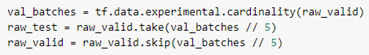

Using \t and \n in print function. Print the following table to describe total, train, valid and test images per class/category/label. Where % stands for percentage of images from the total in that category **(2 marks)**

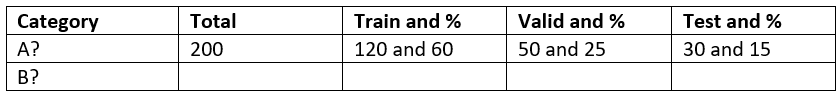

In [ ]:
import os
def get_no_of_files(folder_path):
  lst = os.listdir(folder_path + '/new_with_mask') # your directory path
  no_mask_files = len(lst)
  lst = os.listdir(folder_path + '/new_without_mask')
  no_without_mask = len(lst) 
  return no_without_mask, no_mask_files


In [ ]:
from tabulate import tabulate

train_mask , train_without_mask = get_no_of_files(train_dir)
test_mask , test_without_mask = get_no_of_files(test_dir)
val_mask , val_without_mask = get_no_of_files(val_dir)
total_mask = train_mask+ test_mask +val_mask
total_without_mask = train_without_mask + test_without_mask + val_without_mask

# create data
data =[["With Mask", total_mask, str(train_mask) + ' and ' + str((train_mask*100)/total_mask) + '%',
        str(val_mask) + ' and ' + str((val_mask*100)/total_mask) + '%',
        str(test_mask) + ' and ' + str((test_mask*100)/total_mask) + '%'],
       ["Without Mask", total_without_mask, str(train_without_mask) + ' and ' + str((train_without_mask*100)/total_without_mask) + '%',
        str(val_without_mask) + ' and ' + str((val_without_mask*100)/total_without_mask) + '%',
        str(test_without_mask) + ' and ' + str((test_without_mask*100)/total_without_mask) + '%']
        ] 
#define header
col_names = ["Categoty", "Total", "Train and %", "Valid and %", "Test and %"]
#display table 
print(tabulate(data, headers= col_names))

Categoty        Total  Train and %     Valid and %     Test and %
------------  -------  --------------  --------------  --------------
With Mask       10000  7000 and 70.0%  2000 and 20.0%  1000 and 10.0%
Without Mask    10000  7000 and 70.0%  2000 and 20.0%  1000 and 10.0%


Show images and labels from the training set:

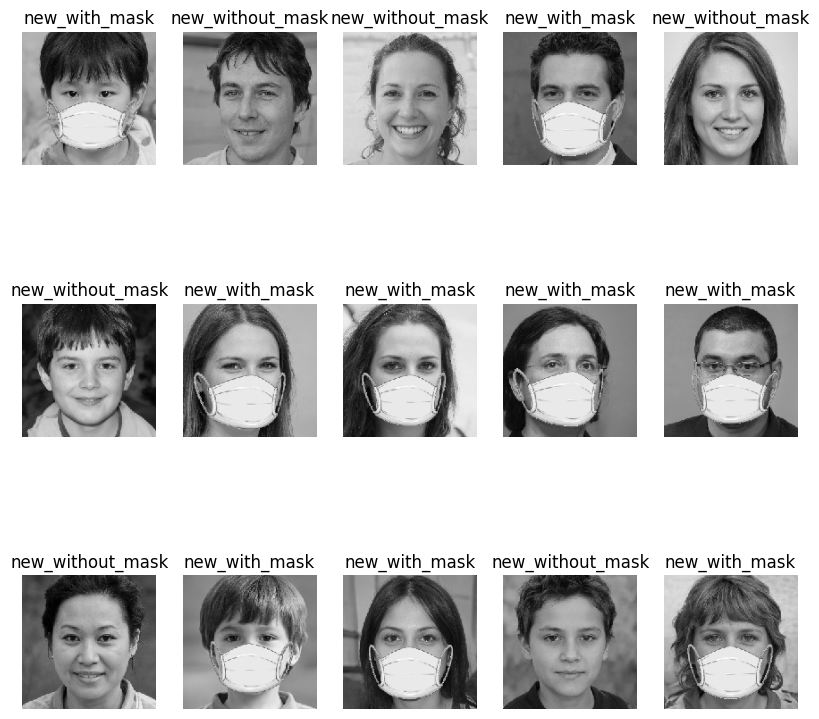

In [ ]:
classes_train = data_train.class_names
plt.figure(figsize=(10,10))
for img, label in data_train.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(classes_train[int(label[i])])
        plt.axis('off')
        
        
# from IPython.display import clear_output
clear_output()

### Format the Data - Data Augmentation

We can use the `tf.image` module to format the images for the task.

Resize the images to a fixed input size, and rescale the input channels to a range of `[-1,1]`

<!-- TODO(markdaoust): fix the keras_applications preprocessing functions to work in tf2 -->

In [ ]:
# Image size
IMG_SIZE = (256, 256)
#IMG_SIZE = (150, 150)

# data argumentation
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                       rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True
                                       )

# data argumentation
test_datagen = ImageDataGenerator(rescale= 1 / 255.0)

Apply this function to each item in the dataset using the map method:

In [ ]:
train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=200, 
                                         shuffle=True,
                                         class_mode="categorical")

test_dataset = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=False,
                                         class_mode="categorical")

validation_dataset = train_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Found 14000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## Create the base model from the pre-trained convnets
You will create the base model from the **MobileNet V2** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful.  Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

Model has been run initial with all layer weights has been fixed (trainable = Flase). With that settings even model accuracy shows more than 99%, confusion metrix shows poor performance. Therefore it was decided to train the weights from 100th layer in the model (54 layers from model selected weight training) 

# Modification to assignment 3 starts from here 

Assignment 3 design for transfer learning with MobileNetV2. This project will be modify to learn with multiple networks. 

1.   MobileNetV2
2.   ResNet101V2
3.   VGG19
4.   VGG16
5.   DenseNet201

In assignment 3, I have allow to train 54 layers within MobileNetV2 to be retrain. But with modification all the layers within Transfer learning will be freeze. 

# MobileNetV2

In [ ]:
from tensorflow.python.ops.math_ops import TruncateMod
# using mobilenetv2 model
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(256,256,3))

for layer in mobilenet.layers:
  layer.trainable = False 

# make pre trained model into non trainable bcoz its takes much time
# for layer in mobilenet.layers:
#     layer.trainable = True

# # Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(mobilenet.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 100

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in mobilenet.layers[:fine_tune_at]:
#   layer.trainable =  False

9406464/9406464 [==============================] - 1s 0us/step


### Add a classification head

Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  Positive numbers predict class 1, negative numbers predict class 0.

In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(mobilenet)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))


Now stack the feature extractor, and these two layers using a `tf.keras.Sequential` model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 128)               10485888  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,744,130
Trainable params: 10,486,146
Non-trainable params: 2,257,984
_________________________________________________________________


### Compile the model

You must compile the model before training it.  Since there are two classes, use a binary cross-entropy loss with `from_logits=True` since the model provides a linear output.

In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 128)               10485888  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,744,130
Trainable params: 10,486,146
Non-trainable params: 2,257,984
_________________________________________________________________


The 396K parameters in MobileNet are frozen, but there are 12.3M _trainable_ parameters in the Dense layer.  These are divided between two `tf.Variable` objects, the weights and biases and in further two Dense layers apart from 54 layers from MobileNet Model.

In [ ]:
len(model.trainable_variables)

4

### Train the model

After training for 20 epochs, you should see ~90%+ accuracy.


In [ ]:
mobilenet_history = model.fit(train_dataset,
                    validation_data=validation_dataset,                              
                    epochs=10,
                    verbose=1)

Epoch 1/10
70/70 [==============================] - 304s 4s/step - loss: 0.0299 - accuracy: 0.9939 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 282s 4s/step - loss: 8.0124e-04 - accuracy: 0.9999 - val_loss: 0.0129 - val_accuracy: 0.9998
Epoch 3/10
70/70 [==============================] - 280s 4s/step - loss: 1.8006e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 280s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 280s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 281s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 281s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss:

In [ ]:
mobilenet_score = model.evaluate(test_dataset)

32/32 [==============================] - 7s 219ms/step - loss: 0.0000e+00 - accuracy: 1.0000


### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

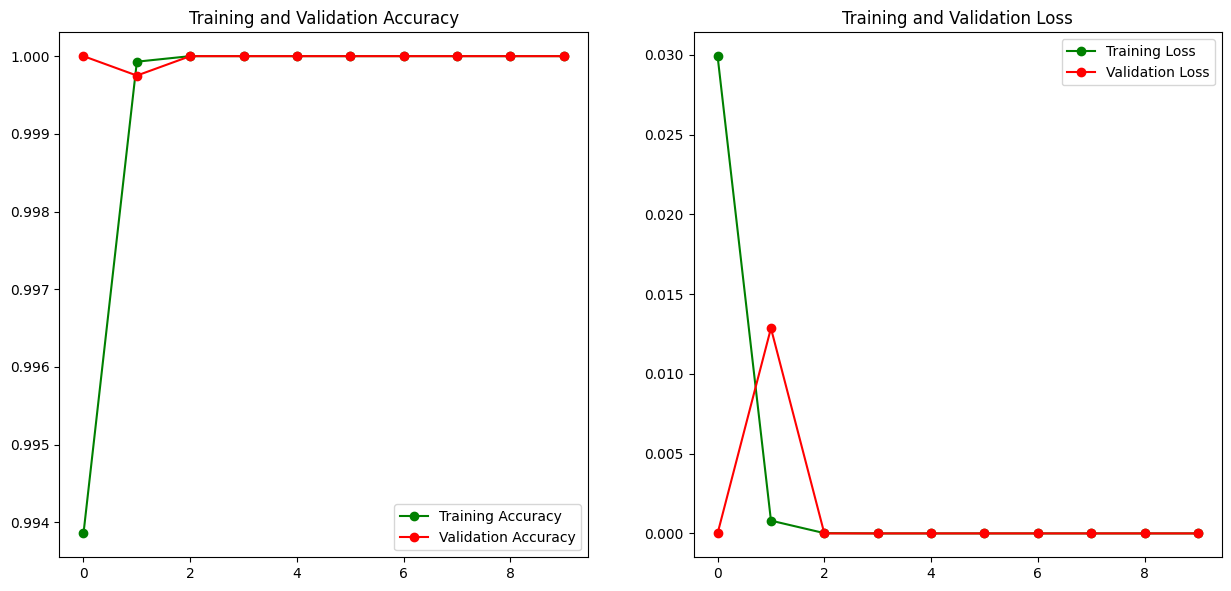

In [ ]:
acc = mobilenet_history.history['accuracy']
val_acc = mobilenet_history.history['val_accuracy']
loss = mobilenet_history.history['loss']
val_loss = mobilenet_history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,"go-", label='Training Accuracy')
plt.plot(epochs_range, val_acc,"ro-", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss,"go-", label='Training Loss')
plt.plot(epochs_range, val_loss,"ro-", label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

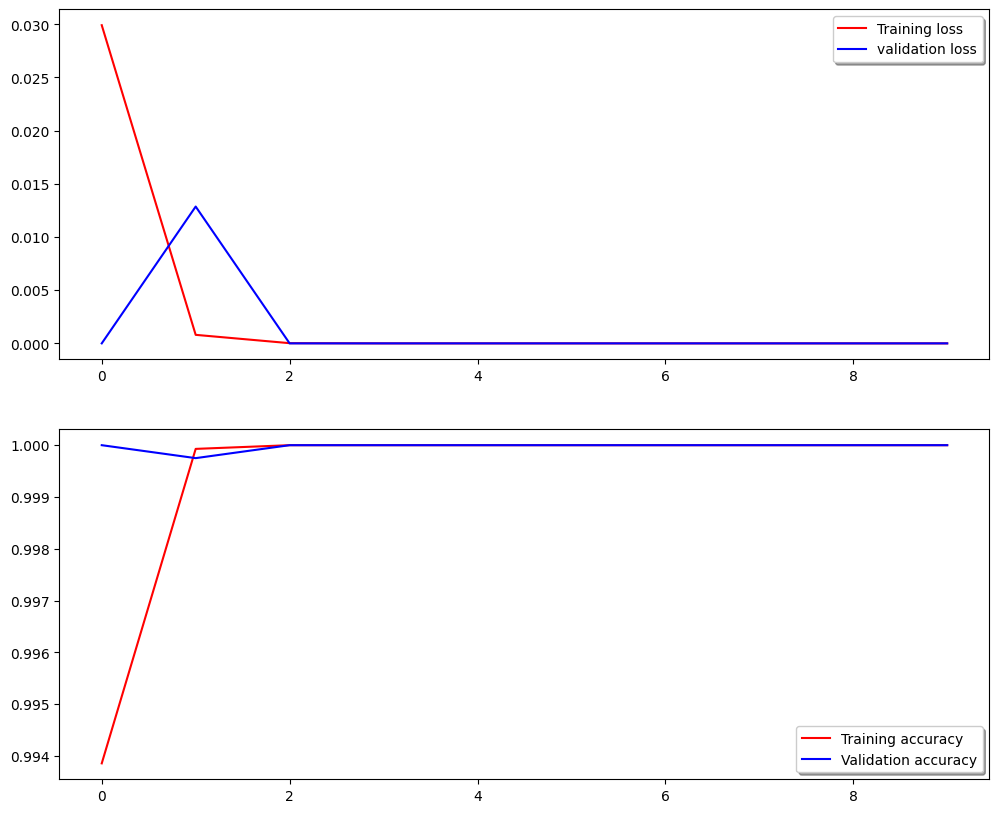

In [ ]:
# Loss
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(mobilenet_history.history['loss'], color='r', label="Training loss")
ax[0].plot(mobilenet_history.history['val_loss'], color='b', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy
ax[1].plot(mobilenet_history.history['accuracy'], color='r', label="Training accuracy")
ax[1].plot(mobilenet_history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
!pip install pyyaml h5py 

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_path = '/content/gdrive/MyDrive/Assignment2/Model/mobilenet.h5'
model.save(model_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ResNet101V2

In [ ]:
resnet101v2 = ResNet101V2(weights='imagenet',include_top=False,input_shape=(256,256,3))
# make pre trained model into non trainable bcoz its takes much time
for layer in resnet101v2.layers:
    layer.trainable = False

171317808/171317808 [==============================] - 9s 0us/step


In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(resnet101v2)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 8, 8, 2048)        42626560  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16777344  
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 59,404,162
Trainable params: 16,777,602
Non-trainable params: 42,626,560
_________________________________________________________________


In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
len(model.trainable_variables)

4

In [ ]:
resnet_history = model.fit(train_dataset,
                    validation_data=validation_dataset,                              
                    epochs=10,
                    verbose=1)

Epoch 1/10
70/70 [==============================] - 331s 4s/step - loss: 0.0643 - accuracy: 0.9924 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 307s 4s/step - loss: 2.5925e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 305s 4s/step - loss: 6.4056e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 307s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9998
Epoch 5/10
70/70 [==============================] - 310s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 309s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 329s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss:

In [ ]:
resnet_score = model.evaluate(test_dataset)

32/32 [==============================] - 13s 388ms/step - loss: 0.0000e+00 - accuracy: 1.0000


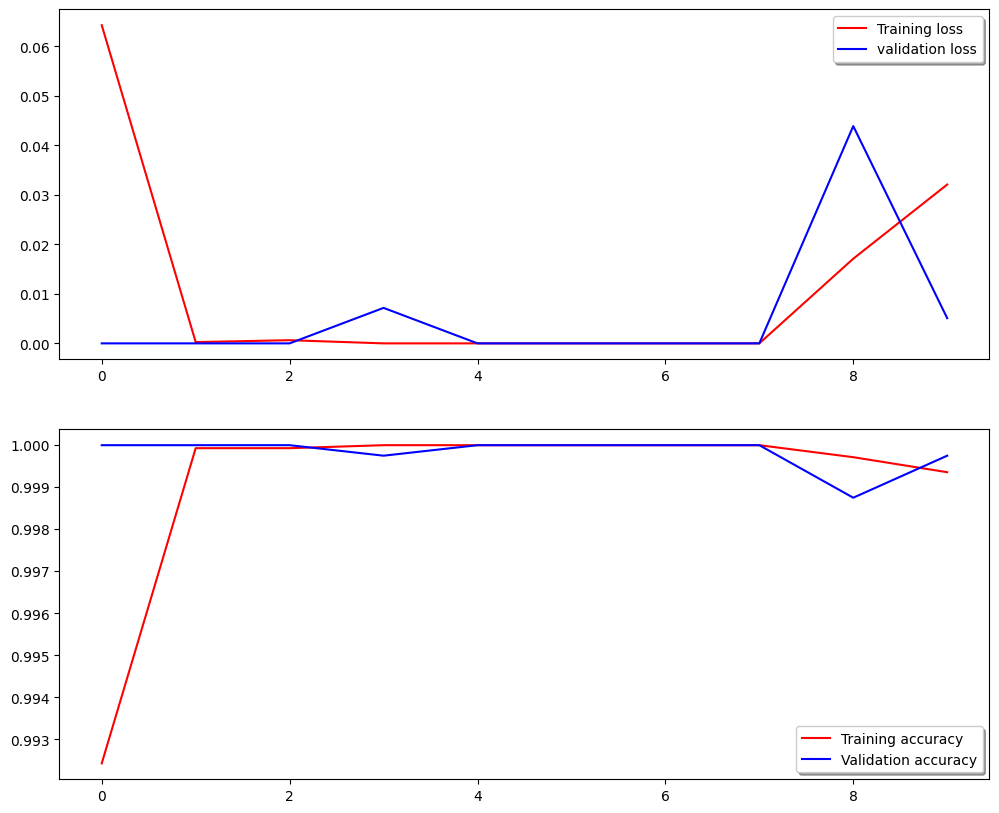

In [ ]:
# Loss
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(resnet_history.history['loss'], color='r', label="Training loss")
ax[0].plot(resnet_history.history['val_loss'], color='b', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy
ax[1].plot(resnet_history.history['accuracy'], color='r', label="Training accuracy")
ax[1].plot(resnet_history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_path = '/content/gdrive/MyDrive/Assignment2/Model/resnet101v2.h5'
model.save(model_path)

# VGG19

In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(256,256,3))

for layer in vgg19.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(vgg19)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 24,219,074
Trainable params: 4,194,690
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
vgg19_history = model.fit(train_dataset,
                    validation_data=validation_dataset,                              
                    epochs=10,
                    verbose=1)

Epoch 1/10
70/70 [==============================] - 358s 5s/step - loss: 0.6208 - accuracy: 0.9159 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 314s 4s/step - loss: 7.0499e-04 - accuracy: 0.9999 - val_loss: 3.9240e-04 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 316s 5s/step - loss: 7.6243e-04 - accuracy: 0.9997 - val_loss: 4.8676e-04 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 316s 5s/step - loss: 4.4108e-04 - accuracy: 0.9999 - val_loss: 6.3198e-04 - val_accuracy: 0.9998
Epoch 5/10
70/70 [==============================] - 314s 4s/step - loss: 3.7514e-04 - accuracy: 0.9999 - val_loss: 3.5795e-04 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 316s 5s/step - loss: 4.4113e-04 - accuracy: 0.9999 - val_loss: 2.4961e-04 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 318s 5s/step - loss: 1.8804e-04 - accuracy: 1.0000 - val_loss:

In [ ]:
vgg19_score = model.evaluate(test_dataset)

32/32 [==============================] - 16s 502ms/step - loss: 7.9670e-06 - accuracy: 1.0000


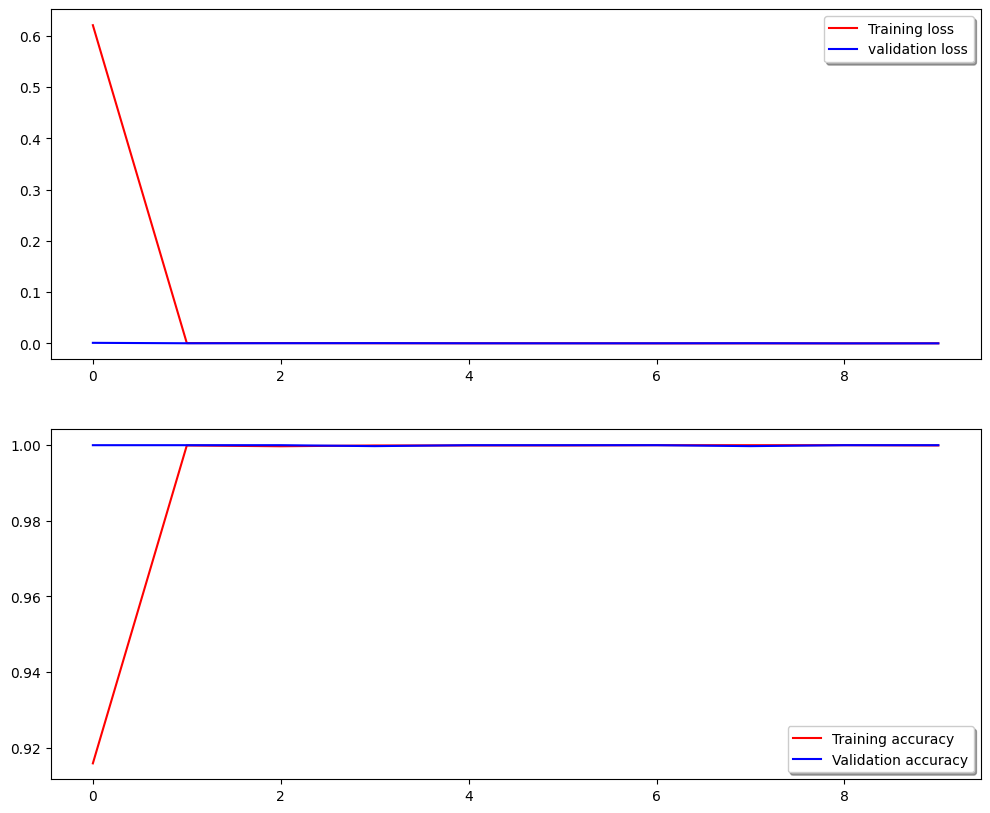

In [ ]:
# Loss
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(vgg19_history.history['loss'], color='r', label="Training loss")
ax[0].plot(vgg19_history.history['val_loss'], color='b', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy
ax[1].plot(vgg19_history.history['accuracy'], color='r', label="Training accuracy")
ax[1].plot(vgg19_history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_path = '/content/gdrive/MyDrive/Assignment2/Model/vgg19.h5'
model.save(model_path)

# VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))

for layer in vgg16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(vgg16)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,909,378
Trainable params: 4,194,690
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
vgg16_history = model.fit(train_dataset,
                    validation_data=validation_dataset,                              
                    epochs=10,
                    verbose=1)

Epoch 1/10
70/70 [==============================] - 312s 4s/step - loss: 0.6133 - accuracy: 0.8824 - val_loss: 0.0139 - val_accuracy: 0.9985
Epoch 2/10
70/70 [==============================] - 306s 4s/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 6.4558e-04 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 310s 4s/step - loss: 3.4697e-04 - accuracy: 1.0000 - val_loss: 2.1569e-04 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 308s 4s/step - loss: 1.1806e-04 - accuracy: 1.0000 - val_loss: 2.0994e-04 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 324s 5s/step - loss: 5.3521e-05 - accuracy: 1.0000 - val_loss: 2.5926e-05 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 309s 4s/step - loss: 2.8649e-05 - accuracy: 1.0000 - val_loss: 2.4968e-05 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 309s 4s/step - loss: 1.6131e-05 - accuracy: 1.0000 - val_loss: 1.1

In [ ]:
vgg16_score = model.evaluate(test_dataset)

32/32 [==============================] - 11s 327ms/step - loss: 5.5954e-06 - accuracy: 1.0000


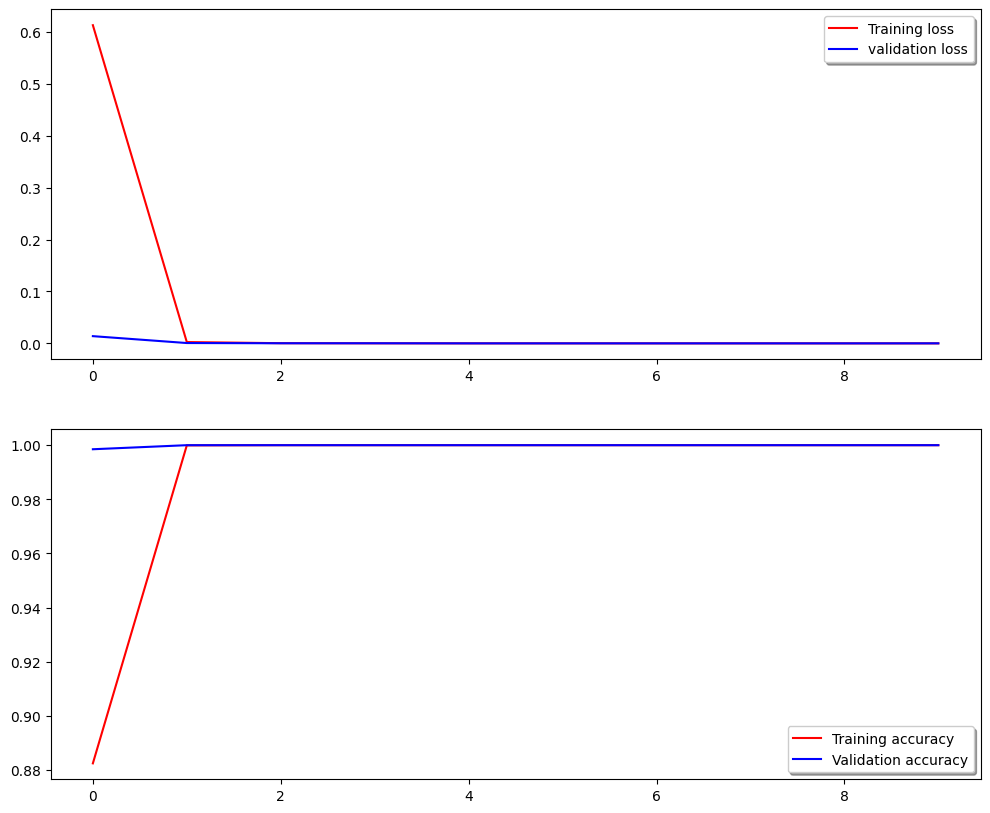

In [ ]:
# Loss
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(vgg16_history.history['loss'], color='r', label="Training loss")
ax[0].plot(vgg16_history.history['val_loss'], color='b', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy
ax[1].plot(vgg16_history.history['accuracy'], color='r', label="Training accuracy")
ax[1].plot(vgg16_history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_path = '/content/gdrive/MyDrive/Assignment2/Model/vgg16.h5'
model.save(model_path)

# DenseNet201

In [ ]:
densenet = DenseNet201(weights = "imagenet",include_top = False,input_shape=(256,256,3))
for layer in densenet.layers:
    layer.trainable = False

74836368/74836368 [==============================] - 5s 0us/step


In [ ]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(densenet)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 flatten_4 (Flatten)         (None, 122880)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               15728768  
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 34,051,010
Trainable params: 15,729,026
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
densenet_history = model.fit(train_dataset,
                    validation_data=validation_dataset,                              
                    epochs=10,
                    verbose=1)

Epoch 1/10
70/70 [==============================] - 351s 5s/step - loss: 0.8388 - accuracy: 0.9729 - val_loss: 9.4174e-09 - val_accuracy: 1.0000
Epoch 2/10
70/70 [==============================] - 320s 5s/step - loss: 3.3276e-05 - accuracy: 1.0000 - val_loss: 2.9802e-11 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 304s 4s/step - loss: 8.1228e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 302s 4s/step - loss: 3.9062e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 303s 4s/step - loss: 6.1077e-05 - accuracy: 0.9999 - val_loss: 2.7864e-08 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 304s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 310s 4s/step - loss: 5.9605e-11 - accuracy: 1.0000 - val_l

In [ ]:
densenet_score = model.evaluate(test_dataset)

32/32 [==============================] - 14s 441ms/step - loss: 0.0000e+00 - accuracy: 1.0000


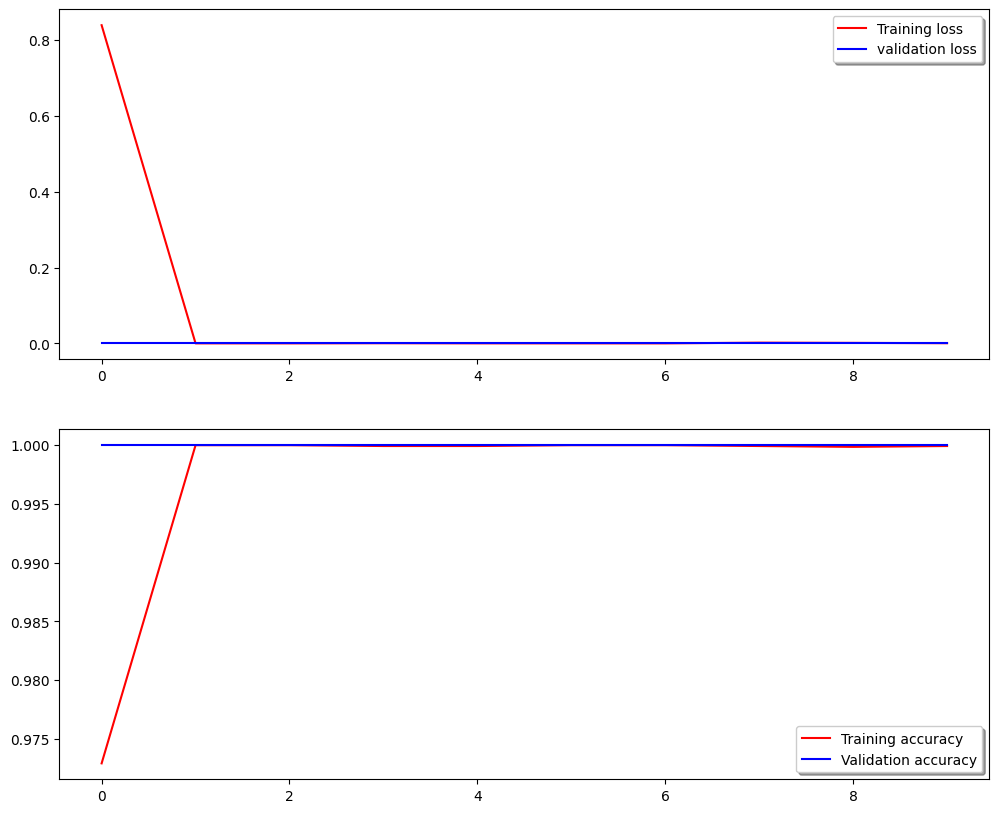

In [ ]:
# Loss
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(densenet_history.history['loss'], color='r', label="Training loss")
ax[0].plot(densenet_history.history['val_loss'], color='b', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# Accuracy
ax[1].plot(densenet_history.history['accuracy'], color='r', label="Training accuracy")
ax[1].plot(densenet_history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_path = '/content/gdrive/MyDrive/Assignment2/Model/densenet.h5'
model.save(model_path)

# Comparison of the models 

In [ ]:
model_histories = [resnet_history ,vgg19_history ,vgg16_history ,mobilenet_history,densenet_history]
names = ['ResNet101V2', 'VGG19', 'VGG16', 'MobileNetV2','DenseNet201']

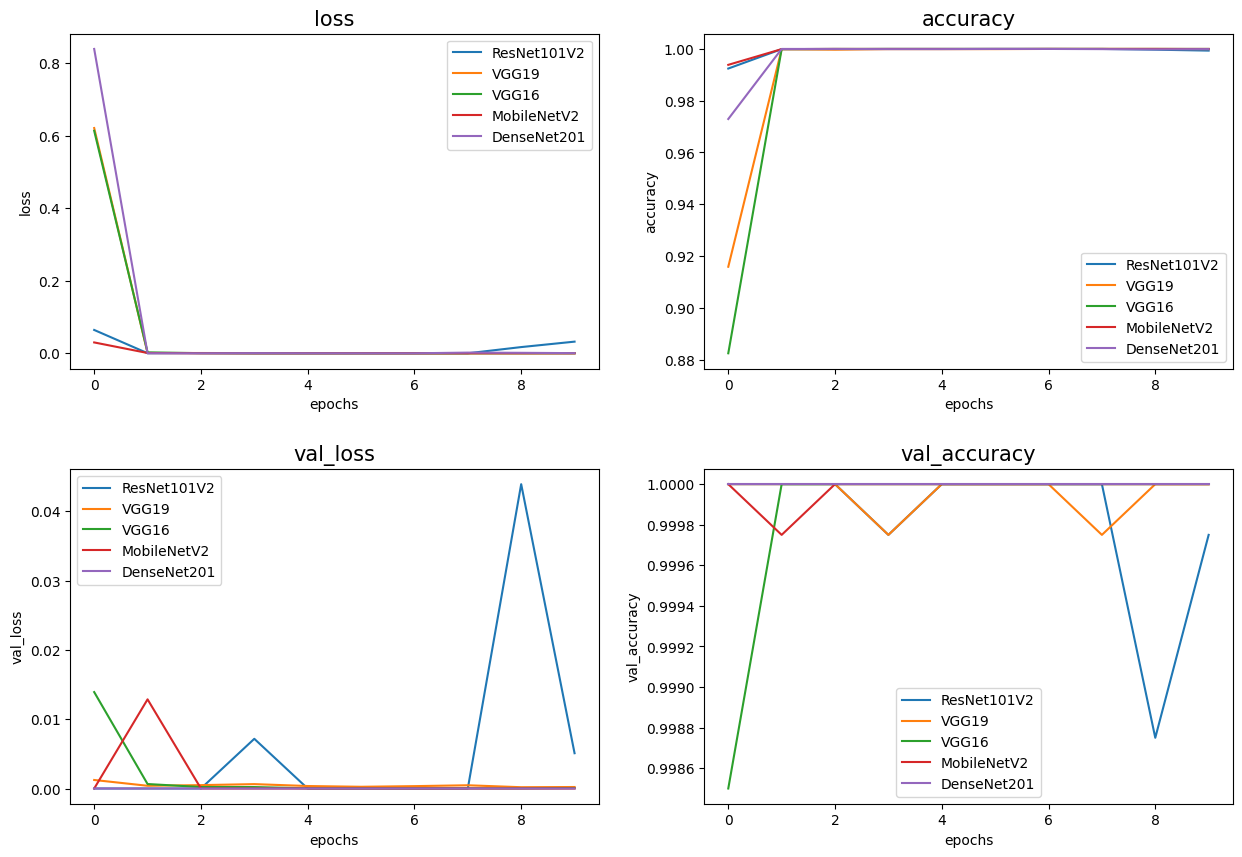

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_histories[0].history:
    index = list(model_histories[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_histories:
        ax.plot(history.history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()

# Infer on a Sample Image

In [ ]:
# test_pred = model.predict(test_dataset)


In [ ]:
# output = [np.argmax(op) for op in test_pred]
# df_output = pd.DataFrame(output)
# print(df_output.value_counts())

Plot 2 images per category and label their predictions. Also label if the prediction is true or false positive for each image in the plot **(2 marks)**

In [ ]:
# def img_preprocessing(path):
#     sample_mask_img = cv2.imread(path)
#     sample_mask_img = cv2.resize(sample_mask_img,(256,256))
#     plt.imshow(sample_mask_img)
#     sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
#     sample_mask_img = sample_mask_img/255.0
#     res = np.argmax(model.predict(sample_mask_img))
#     print('            ', colored(classes_train[res], "green"))

In [ ]:
# img_preprocessing('/content/imags/test/new_without_mask/seed0528.png')

In [ ]:
# img_preprocessing('/content/imags/test/new_with_mask/with-mask-default-mask-seed1050.png')

Compute the confusion matrix summarising the success rate per category. **(4 marks)**

For example, a confusion matrix for 3 classes looks like [this](https://miro.medium.com/max/1070/1*fAnPdBPYYerKJKoG-0s98w.jpeg)

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns


# scoreTest = model.evaluate(test_dataset)


# test_preds = np.argmax(test_pred, axis = 1)
# cm = confusion_matrix(test_labels, test_preds)

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# all_sample_title = f'Model Accuracy Score: {scoreTest[1]:.2%}'
# plt.title(all_sample_title, size = 15)

# print(classification_report(test_labels, test_preds, target_names=class_names))



We got a model accuracy of 100% on training and validation data. The model performs extreamly well when it comes to testing data (previously unforeseen). Precision and Recall are 100% which is really good for the ML model. 


## Save and Load the Model:

Following section is designed save model and reload for verification. 

**Steps followed**

* Connect Google Drive 
* Save current model 
* Load saved model to new container 
* Verify its performance with few predictions and confusion matrix

### Connect Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

### Save Model to drive in HDF5 Format

In [ ]:
# !pip install pyyaml h5py 

# # Save the entire model to a HDF5 file.
# # The '.h5' extension indicates that the model should be saved to HDF5.
# model_path = '/content/gdrive/MyDrive/Assignment2/Model/my_model.h5'
# model.save(model_path)

### Verify Save Model 

In [ ]:
# from keras.models import load_model
# # Recreate the exact same model, including its weights and the optimizer
# new_model = load_model(model_path)

# # Show the model architecture
# new_model.summary()

### Predict and Confusion Matrix

In [ ]:
# def img_preprocessing(path):
#     sample_mask_img = cv2.imread(path)
#     sample_mask_img = cv2.resize(sample_mask_img,(256,256))
#     plt.imshow(sample_mask_img)
#     sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
#     sample_mask_img = sample_mask_img/255.0
#     res = np.argmax(new_model.predict(sample_mask_img))
#     print('            ', colored(classes_train[res], "red"))

In [ ]:
# img_preprocessing('/content/imags/test/new_with_mask/with-mask-default-mask-seed2056.png')

In [ ]:
# test_pred2 = new_model.predict(test_dataset)
# scoreTest2 = new_model.evaluate(test_dataset)


# test_preds2 = np.argmax(test_pred2, axis = 1)
# cm = confusion_matrix(test_labels, test_preds2)

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# all_sample_title = f'Model Accuracy Score: {scoreTest2[1]:.2%}'
# plt.title(all_sample_title, size = 15)

# print(classification_report(test_labels, test_preds2, target_names=class_names))

## Summary:

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.
